In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tsla = yf.download("TSLA", period="1y")
tsla.head()



/var/folders/zh/9srb_wyj6mg_9gw7blpqcvk40000gn/T/ipykernel_12505/717044003.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", period="1y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-07-15,252.639999,265.600006,251.729996,255.970001,146912900
2024-07-16,256.559998,258.619995,245.800003,255.309998,126332500
2024-07-17,248.500000,258.470001,246.179993,252.729996,115584800
2024-07-18,249.229996,257.140015,247.199997,251.089996,110869000
2024-07-19,239.199997,249.440002,236.830002,247.789993,87403900


In [17]:
tsla["Daily Return"] = tsla["Close"].pct_change()


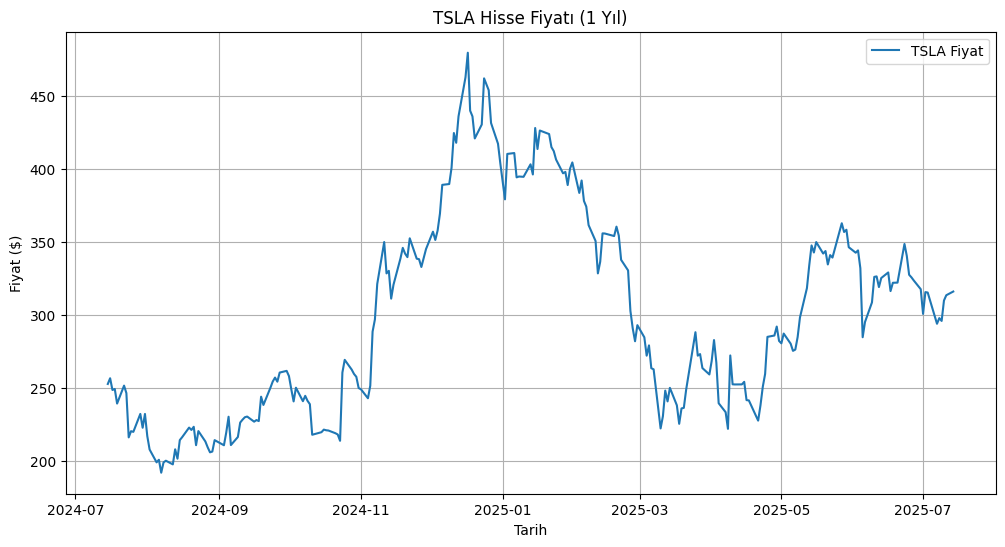

In [18]:
plt.figure(figsize=(12,6))
plt.plot(tsla["Close"], label="TSLA Fiyat")
plt.title("TSLA Hisse Fiyatı (1 Yıl)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.legend()
plt.grid(True)
plt.show()

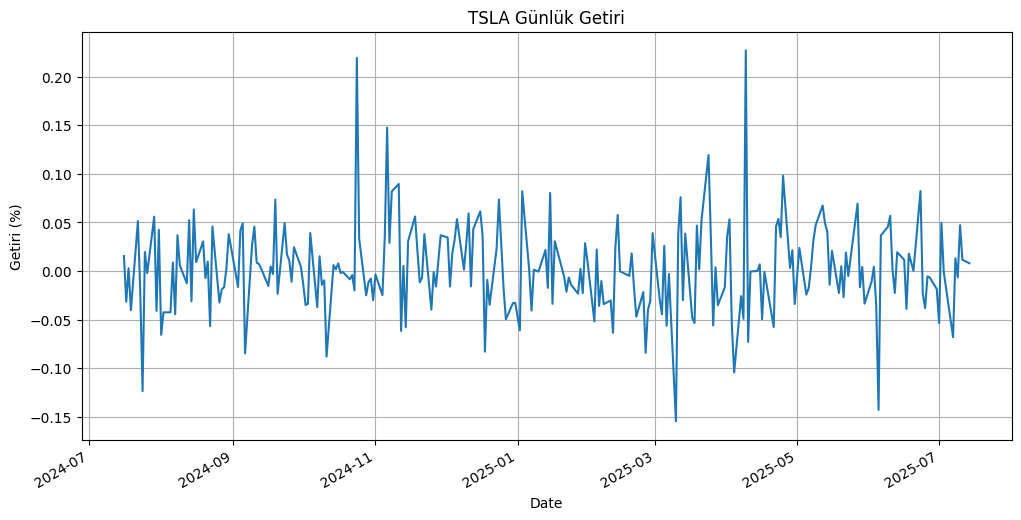

In [19]:
plt.figure(figsize=(12,6))
tsla["Daily Return"].plot()
plt.title("TSLA Günlük Getiri")
plt.ylabel("Getiri (%)")
plt.grid(True)
plt.show()

In [20]:
tsla.to_excel("TSLA_1y_analysis.xlsx")


In [21]:
tsla["SMA20"] = tsla["Close"].rolling(window=20).mean()
tsla["SMA50"] = tsla["Close"].rolling(window=50).mean()

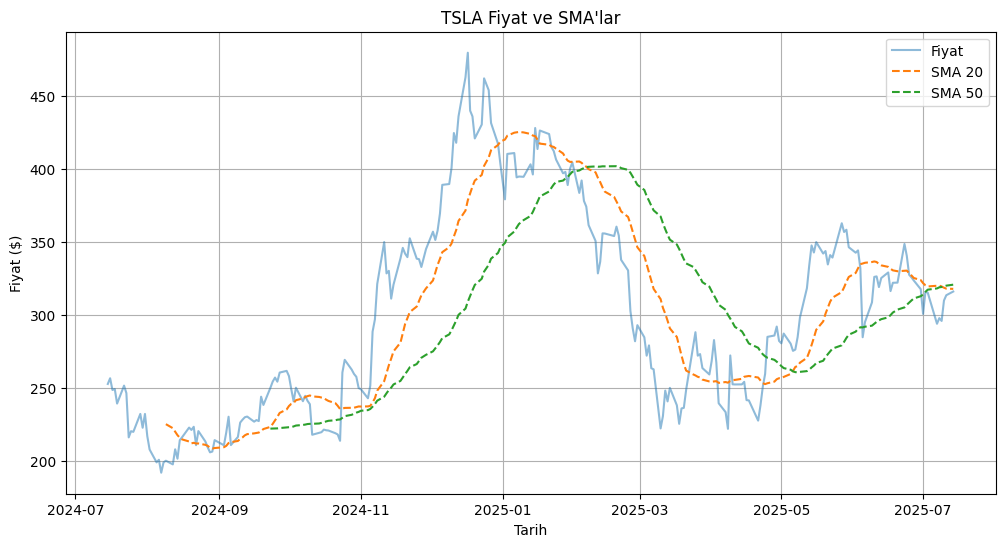

In [22]:
plt.figure(figsize=(12,6))
plt.plot(tsla["Close"], label="Fiyat", alpha=0.5)
plt.plot(tsla["SMA20"], label="SMA 20", linestyle="--")
plt.plot(tsla["SMA50"], label="SMA 50", linestyle="--")
plt.title("TSLA Fiyat ve SMA'lar")
plt.xlabel("Tarih")
plt.ylabel("Fiyat ($)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

tsla["RSI"] = compute_rsi(tsla["Close"])

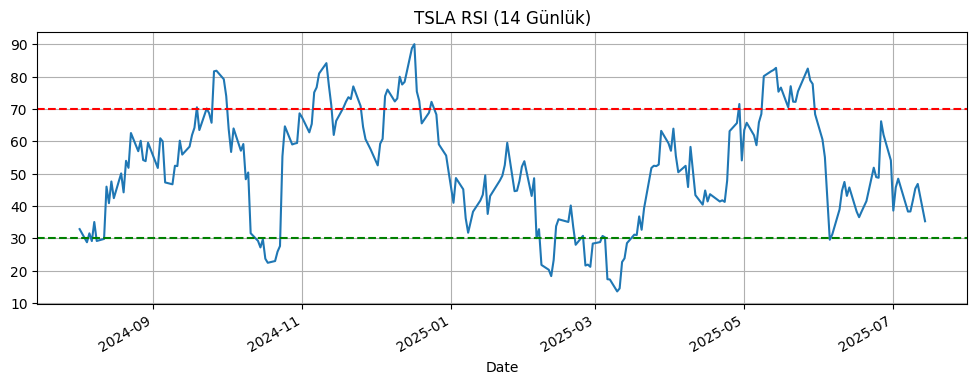

In [24]:
plt.figure(figsize=(12,4))
tsla["RSI"].plot()
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("TSLA RSI (14 Günlük)")
plt.grid(True)
plt.show()

In [25]:
tsla.to_excel("TSLA_Teknik_Gosterge_Analizi.xlsx")
